In [4]:
import tensorflow as tf


#creating data

In [5]:
from sklearn.datasets import make_circles

x,y=make_circles(n_samples=1000,noise=0.03,random_state=42)


#visualize data

In [6]:
import pandas as pd
circles=pd.DataFrame({"x0":x[:,0],"x1":x[:,1],"label":y})
circles


,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


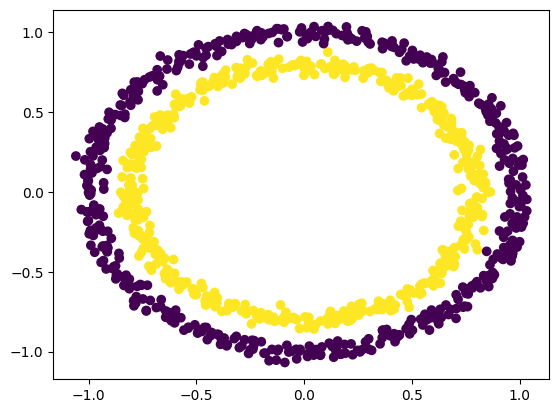

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap="viridis")
plt.show()

In [8]:
x.shape,y.shape

((1000, 2), (1000,))

In [10]:
tf.random.set_seed(42)
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
model.fit(x,y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4773 - loss: 6.5592
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4773 - loss: 6.5553
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4773 - loss: 6.5414
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4784 - loss: 6.4668 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4784 - loss: 6.4628


In [11]:
# increase duraction
model.fit(x,y,epochs=200,verbose=0)
model.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4916 - loss: 3.8693  


[3.8904755115509033, 0.4729999899864197]

In [16]:
tf.random.set_seed(42)

model2=tf.keras.models.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
model2.fit(x,y,epochs=50,verbose=0)

In [15]:
#improve model

In [17]:
y_pred=model2.predict(x)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [24]:
import numpy as np
import matplotlib.pyplot as plt

def plot(model, x, y):
    # define bounds
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

    # create meshgrid
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    # predict
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)

    # binary vs multiclass
    if y_pred.shape[1] > 1:
        print("multi-class classification")
        y_pred = np.argmax(y_pred, axis=1)
    else:
        print("binary classification")
        y_pred = np.round(y_pred).flatten()

    y_pred = y_pred.reshape(xx.shape)

    # plot
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors="k")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step
binary classification


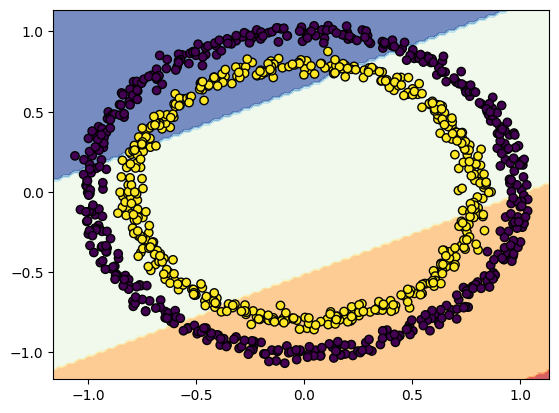

In [25]:
# check model prediciton
plot(model=model2,x=x,y=y)
